# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Mukhammad Iskhaq Khakim
- Email: m284b4ky3148@bangkit.academy
- Id Dicoding: Mukhammad Iskhaq Khakim

## Menentukan Pertanyaan Bisnis

    -Pertanyaan 1: pada jam berapa penyewaan sepeda yang paling banyak dan paling sedikit ?
    -Pertanyaan 2: pada musim apa penyewaan sepeda paling banyak?
   

## Menyiapkan semua library yang dibutuhkan

In [26]:
# memanggil semua library yang dibutuhkan.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

## Data Wrangling

### Gathering Data

In [27]:
drive.mount('/content/drive')
file_path1 = '/content/drive/My Drive/day.csv'
file_path2 = '/content/drive/My Drive/hour.csv'
# Memuat tabel day
day_df = pd.read_csv(file_path1)
day_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [28]:
# Memuat tabel hour
hour_df = pd.read_csv(file_path2)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [29]:
# memeriksa tipe data data dari tiap kolom yang terdapat dalam hour_df dan day_df.
hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [30]:
# mengecek keberadaan missing value di dataset hour_df
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [31]:
# mengecek keberadaan missing value di dataset day_df
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


dapat dilihat bahwa tidak ada missing value di dataframe hour_df dan day_df

In [32]:
# memeriksa duplikasi
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
print("Jumlah duplikasi: ", day_df.duplicated().sum())


Jumlah duplikasi:  0
Jumlah duplikasi:  0


Saat menjalankan kode di atas, dapat kita perhatikan bahwa tidak ada data yang mengalami duplikasi.

In [33]:
# memeriksa parameter statistik dari kolom numerik yang terdapat didalam day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [34]:
# memeriksa parameter statistik dari kolom numerik yang terdapat di dalam day_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

- Kita akan menghapus kolom **instant** dan **workingday**. Kolom **workingday** dianggap sudah terwakili oleh **weekday**, sedangkan **instant** tidak relevan dengan analisis.  
- Selanjutnya, tipe data **int** pada kolom **season**, **mnth**, **holiday**, **weekday**, dan **weathersit** akan diubah menjadi **category**, karena kolom-kolom tersebut memiliki nilai dalam bentuk kategori dengan beberapa varian.  
  **Data kategori** adalah informasi yang dikelompokkan berdasarkan kategori tertentu.  
- Kolom **dteday** yang sebelumnya memiliki tipe data **object** akan diubah menjadi **datetime**.  
- Nama-nama kolom akan diubah agar lebih mudah dipahami.  
- Nilai dalam beberapa kolom akan dikonversi agar lebih jelas dan mudah dimengerti.  
- Kolom baru bernama **category_days** akan dibuat untuk menunjukkan apakah harinya termasuk **weekend** atau **weekday**.

#### Dropping

In [35]:
# kita akan menghapus kolom instant dan workingday. untuk workingday menurut saya sudah diwakili oleh weekday, dan untuk instant tidak ada hubungannya
hour_df.drop(['workingday'], axis = 1, inplace= True)
day_df.drop(['workingday'], axis = 1, inplace= True)


#### Mengubah Tipe Data

##### int to category

In [36]:
# akan merubah tipe data int menjadi category pada kolom 'season', 'mnth', 'holiday', 'weekday', 'weathersit'
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")


##### object to datetime

In [37]:
# menghandling tipe data dteday yang tadinya 'object' akan kita ubah menjadi 'datetime'
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])


#### Rename

##### Mengubah nama kolom pada dataset *day_df* agar lebih mudah dipahami

In [38]:
# Mengganti nama kolom agar lebih mudah dibaca di dataset day_df
day_df.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [39]:
# Mengganti nama kolom agar lebih mudah dibaca di dataset hour_df
hour_df.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [40]:
# Mengkonversi isi kolom agar mudah dipahami
# konversi season menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

# konversi month menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# konversi weather_situation menjadi: 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
day_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
hour_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

# konversi one_of_week menjadi: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
day_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hour_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# konversi year menjadi: 0:2011, 1:2012
day_df.year.replace((0,1), ('2011','2012'), inplace=True)
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)

# Menghitung Humidity
day_df['humidity'] = day_df['humidity']*100
hour_df['humidity'] = hour_df['humidity']*100


<ipython-input-40-cccacc0508f8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
<ipython-input-40-cccacc0508f8>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), i

#### Menambahkan kolom baru bernama *category_days* untuk mengindikasikan apakah isinya termasuk *weekend* atau *weekday*.

In [41]:
# Membuat kolom baru bernama category_days yang menunjukan isi kolom tersebut weekend atau weekdays
one_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def get_category_days(one_of_week):
    if one_of_week in ["Saturday", "Sunday"]:
        return "weekend"
    else:
        return "weekdays"

hour_df["category_days"] = hour_df["one_of_week"].apply(get_category_days)
day_df["category_days"] = day_df["one_of_week"].apply(get_category_days)

In [42]:
def classify_humidity(humidity):
    if humidity < 45:
        return "Terlalu kering"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "Terlalu Lembab"

hour_df["humidity_category"] = hour_df["humidity"].apply(classify_humidity)
day_df["humidity_category"] = day_df["humidity"].apply(classify_humidity)

Terlihat bahwa:  
- Kolom **instant** dan **workingday** telah dihapus ✓  
- Tipe data pada kolom **dteday** telah diubah menjadi **datetime** ✓  
- Tipe data **int** pada kolom **season**, **mnth**, **holiday**, **weekday**, **workingday**, dan **weathersit** telah dikonversi menjadi tipe data **category** ✓  
- Nama kolom telah diubah agar lebih mudah dimengerti ✓  
- Isi kolom telah dikonversi untuk meningkatkan pemahaman ✓  
- Kolom baru bernama **category_days** telah ditambahkan dengan nilai berupa **weekend** atau **weekday** ✓

## Exploratory Data Analysis (EDA)

### Explore Data hour_df


In [43]:
# melihat rangkuman parameter statistik dari data hour_df
hour_df.describe(include="all")

,instant,dteday,season,year,month,hours,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,May,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Terlalu Lembab
freq,NaN,NaN,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,8356
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


Berdasarkan rangkuman parameter statistik di atas, diketahui bahwa jumlah pelanggan adalah 17.379. Data menunjukkan bahwa penyewaan sepeda berlangsung dalam rentang waktu antara pukul 00.00 hingga 23.59, dengan rata-rata waktu penyewaan terjadi pada pukul 11.54 dan standar deviasi sebesar 6,91.

In [44]:
# penyewaan berdasarkan jam
hour_df.groupby(by="hours").agg({
    "count_cr": ["sum"]
})

,count_cr
,sum
hours,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


Berdasarkan pivot table di atas, dapat diketahui bahwa pelanggan yang memilliki banyak menyewa sepeda terjadi pada jam 17.00 sedangkan penyewaan sepeda yang paling sedikit dimiliki pada jam 04.00

### Explore Data day_df


In [45]:
# melihat rangkuman parameter statistik dari data day_df
day_df.describe(include="all")


,instant,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,731.000000,731,731,731,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,4,2,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,Jan,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Ideal
freq,NaN,NaN,188,366,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,334
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


Berdasarkan rangkuman parameter statistik di atas, diketahui bahwa jumlah pelanggan adalah 17.379. Data menunjukkan bahwa penyewaan sepeda berlangsung dalam rentang waktu antara pukul 00.00 hingga 23.59, dengan rata-rata waktu penyewaan terjadi pada pukul 11.54 dan standar deviasi sebesar 6,91.

In [46]:
# melihat jumlah penyewaan tiap season
day_df.groupby(by="season").count_cr.sum().sort_values(ascending=False).reset_index().head(10)

<ipython-input-46-36db49eea7da>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").count_cr.sum().sort_values(ascending=False).reset_index().head(10)


,season,count_cr
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


Berdasarkan hasil tersebut, dapat diketahui bahwa musim **fall** dan **summer** adalah dua musim dengan jumlah penyewaan terbanyak.

In [47]:
# melihat jumlah penyewaan tiap tahun berdasarkan registered dan casul
day_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


Berdasarkan gambar di atas, terdapat perbedaan yang signifikan antara jumlah penyewa yang sudah menjadi anggota dan yang belum. Pada tahun 2011, jumlah penyewa yang sudah menjadi anggota mencapai 995.851, sedangkan yang belum menjadi anggota hanya sebanyak 247.252.

Dapat dilihat dari gambar di atas bahwa pada tanggal merah, minat penyewaan sepeda lebih sedikit dibandingkan dengan tanggal biasa.

## Visualization & Explanatory Analysis

- Pada jam berapa penyewaan sepeda paling banyak dan paling sedikit?  
- Musim apa yang mencatatkan jumlah penyewaan sepeda terbanyak?  

### Pertanyaan 1: Pada jam berapa penyewaan sepeda paling banyak dan paling sedikit?

In [48]:
# melakukan grouping terhadap hours dan count_cr
sum_order_items_df = hour_df.groupby("hours").count_cr.sum().sort_values(ascending=False).reset_index()


<ipython-input-54-05fe2c411630>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar1 = sns.barplot(
<ipython-input-54-05fe2c411630>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar2 = sns.barplot(


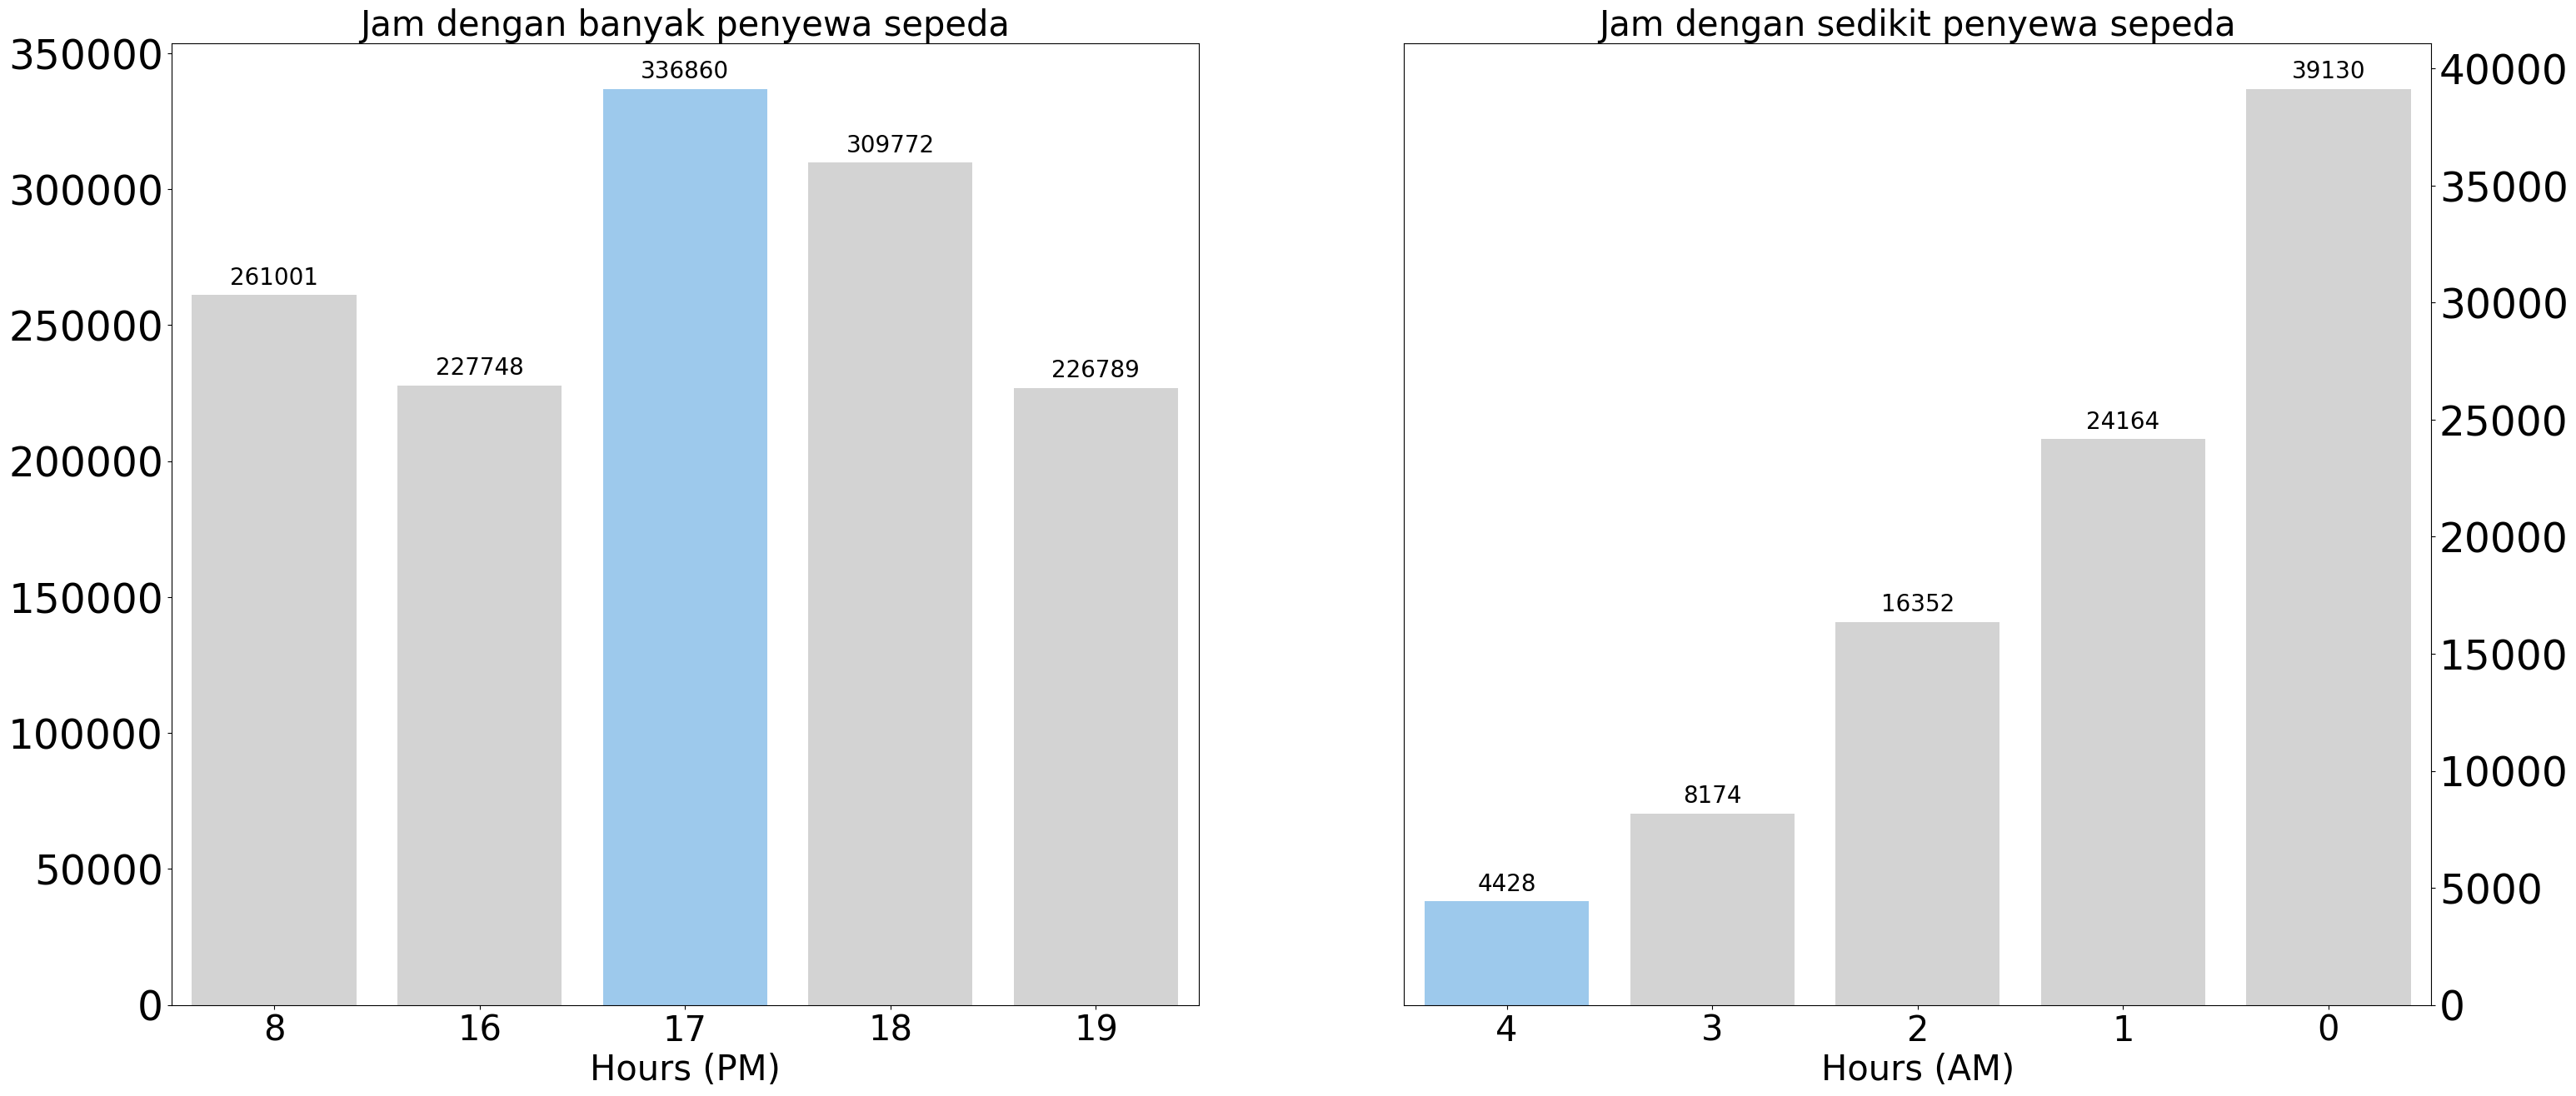

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

# Membuat barplot untuk penyewa sepeda terbanyak
bar1 = sns.barplot(
    x="hours", y="count_cr",
    data=sum_order_items_df.head(5),
    palette=["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3"],
    ax=ax[0]
)

# Menambahkan keterangan numerik secara manual pada setiap batang
for container in bar1.containers:
    bar1.bar_label(container, fmt='%.0f', fontsize=20, padding=5)

# Mengatur label dan judul untuk subplot pertama
ax[0].set_ylabel(None)
ax[0].set_xlabel("Hours (PM)", fontsize=30)
ax[0].set_title("Jam dengan banyak penyewa sepeda", loc="center", fontsize=30)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

# Membuat barplot untuk penyewa sepeda terdikit
bar2 = sns.barplot(
    x="hours", y="count_cr",
    data=sum_order_items_df.sort_values(by="hours", ascending=True).head(5),
    palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#90CAF9"],
    ax=ax[1]
)

# Menambahkan keterangan numerik secara manual pada setiap batang
for container in bar2.containers:
    bar2.bar_label(container, fmt='%.0f', fontsize=20, padding=5)

# Mengatur label dan judul untuk subplot kedua
ax[1].set_ylabel(None)
ax[1].set_xlabel("Hours (AM)", fontsize=30)
ax[1].set_title("Jam dengan sedikit penyewa sepeda", loc="center", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

# Menampilkan plot
plt.show()


Berdasarkan gambar di atas, dapat dilihat bahwa penyewaan sepeda paling banyak terjadi pada pukul 17:00 dengan sekitar 336.860 penyewaan. Sebaliknya, penyewaan sepeda paling sedikit terjadi pada pukul 04:00, dengan hanya sekitar 4.428 penyewaan.

### Pertanyaan 2: Musim apa yang mencatatkan jumlah penyewaan sepeda terbanyak?

<ipython-input-58-6e24810c8dba>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(


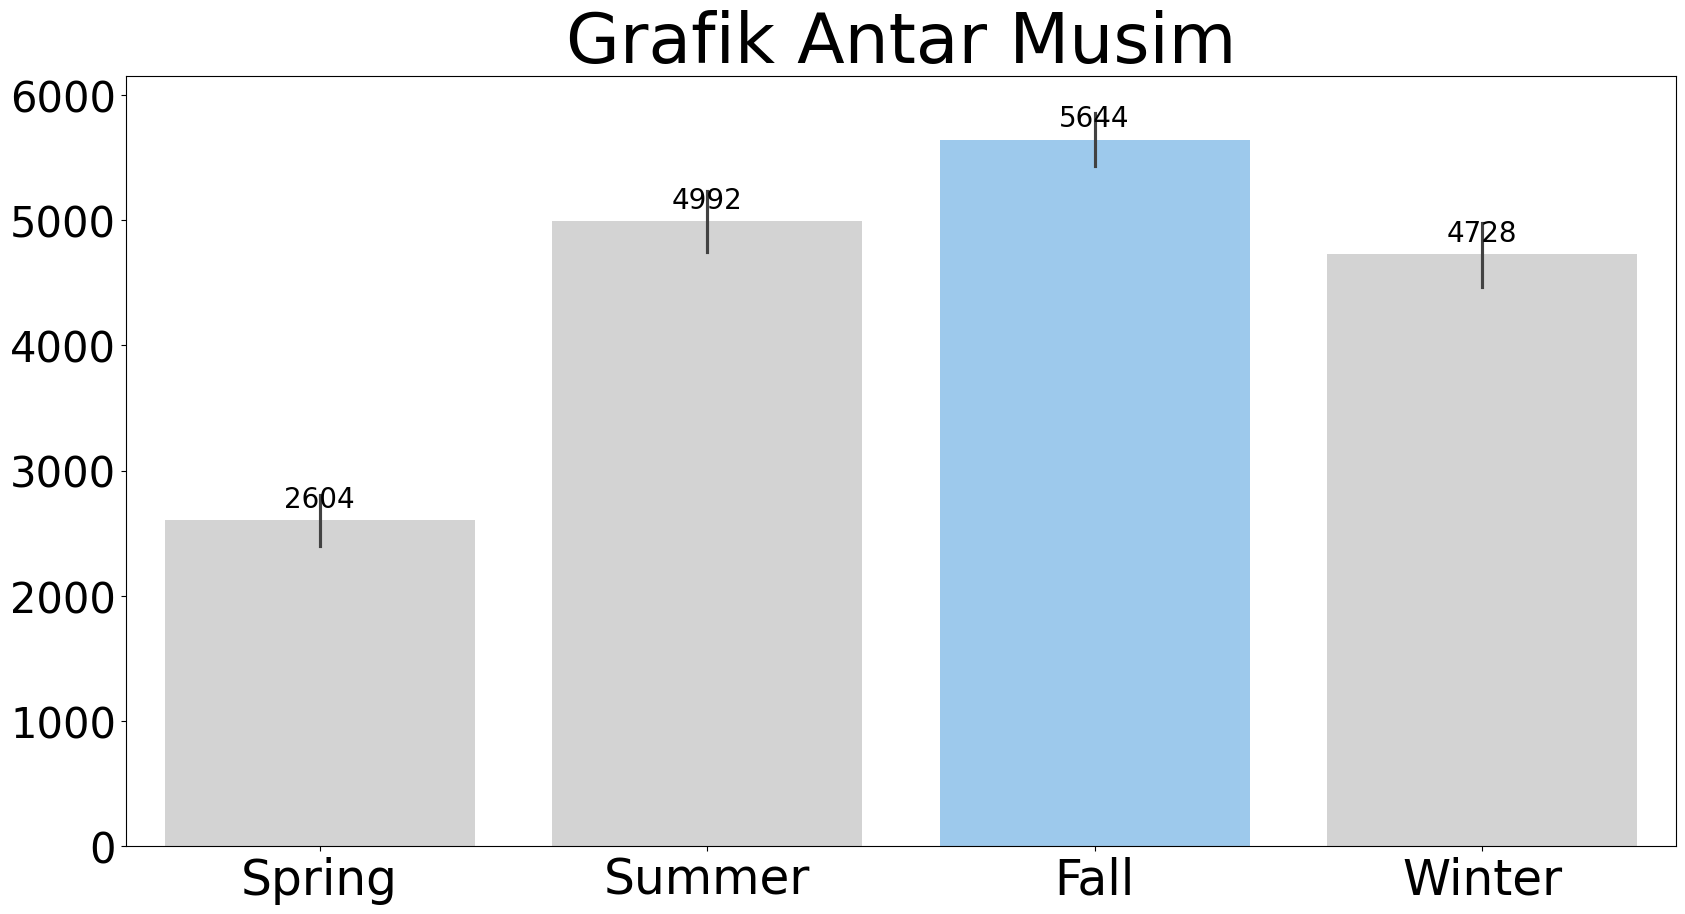

In [58]:
# Mengatur warna untuk setiap musim
colors = ["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3"]

# Membuat subplot dengan ukuran (20, 10)
fig, ax = plt.subplots(figsize=(20, 10))

# Membuat barplot untuk jumlah penyewaan sepeda berdasarkan musim
bar = sns.barplot(
    y="count_cr",
    x="season",
    data=day_df.sort_values(by="season", ascending=False),
    palette=colors,
    ax=ax
)

# Menambahkan label numerik pada setiap batang
for container in bar.containers:
    bar.bar_label(container, fmt='%.0f', fontsize=20, padding=5)

# Mengatur judul, label, dan tampilan sumbu
ax.set_title("Grafik Antar Musim", loc="center", fontsize=50)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)

# Menampilkan plot
plt.show()


Musim dengan jumlah penyewaan terbanyak adalah musim Fall (musim gugur), dengan total penyewaan mencapai 5644 penyewaan.

## Conclusion

Pertanyaan:<br>
    -Pertanyaan 1: pada jam berapa penyewaan sepeda yang paling banyak dan paling sedikit ?  <br>
    -Pertanyaan 2: pada musim apa penyewaan sepeda paling banyak? <br>
   

Poin 1:
Berdasarkan gambar di atas, penyewaan sepeda paling banyak terjadi pada jam 17:00, dengan total penyewaan sebanyak 336.860 kali. Sebaliknya, penyewaan sepeda paling sedikit terjadi pada jam 04:00, dengan total penyewaan hanya 4.428 kali. Hal ini menunjukkan bahwa aktivitas penyewaan sepeda cenderung meningkat pada sore hari ketika orang kemungkinan besar pulang kerja atau beraktivitas santai, dan menurun drastis pada dini hari.

Poin 2:
Penyewaan sepeda berdasarkan musim menunjukkan bahwa musim Fall (musim gugur) merupakan musim dengan jumlah penyewaan terbanyak, yaitu mencapai total 5.644 kali. Hal ini mengindikasikan bahwa musim gugur menjadi waktu yang populer untuk aktivitas bersepeda, mungkin karena cuaca yang lebih nyaman dibandingkan musim lainnya.